<a href="https://colab.research.google.com/github/nayrr25/Matem-tica-financiera/blob/main/Semana2_MatMercFin1_Forwards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forwards

Hablemos de 2 conceptos fundamentales para esta clase.

- Ganancia/Pérdida del Forward
- Valuación del Forward


Primero, ¿cómo podríamos decidir cual sería el valor justo en un contrato tipo Forward?

In [ ]:
# !pip install yfinance

In [ ]:
import numpy as np
import pandas as pd

import yfinance as yf

Recordemos el término de valor presente o dar valor a futuro (son muy parecidos)

In [ ]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "GOOG NVDA",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "1y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        # group_by = 'ticker',
    ).loc[:, 'Adj Close']
data

[*********************100%%**********************]  2 of 2 completed


Ticker,GOOG,NVDA
Date,,
2023-07-20,119.394135,45.506374
2023-07-21,120.173248,44.295734
2023-07-24,121.741463,44.598648
2023-07-25,122.650429,45.665329
2023-07-26,129.512619,45.438400
...,...,...
2024-07-15,188.190002,128.440002
2024-07-16,185.500000,126.360001
2024-07-17,182.619995,117.989998


* ¿Es necesario aclarar la diferencia entre una Series y un DataFrame en pandas?

In [ ]:
data[['GOOG']].shape

(252, 1)

In [ ]:
data['GOOG'].shape

(252,)

# Precio justo

In [ ]:
spot_price = data['NVDA'][-1]
spot_price

117.93000030517578

In [ ]:
# Precio justo, suponiendo que la tasa libre de riesgo es constante
r = 0.052
T = 90/365
forward_price = spot_price * (1 + r*T)
forward_price

119.44208907621201

In [ ]:
# Precio justo cuando se toma como proceso continuo
r = 0.052
T = 90/365
forward_price = spot_price * np.exp(r*T)
forward_price

119.45182457996158

# Ejercicio

Haga el código del siguiente escenario:
Ves el precio actual de NVIDIA (aprox 117), calculas el valor futuro de modo sencillo y decides entrar en un contrato Forward en Largo (te comprometes a comprar). 10 días después, el activo subió a 130, y decides entrar en un contrato de tipo Forward en Corto y lo haces a un precio justo.

¿Que ganancia obtendrías?

¿Si decides ejecutar tus contratos, que ganancia tendrías al traerla a valor presente?

In [ ]:
# Espacio para el ejercicio (pueden agregar mas celdas de código)

In [3]:
import numpy as np
import yfinance as yf

# Descargar datos de Yahoo Finance
data = yf.download(tickers="NVDA", period="1d")
spot_price = data['Close'].iloc[-1]
print(f"Precio spot actual de NVIDIA: {spot_price:.2f}")

# Parámetros
r = 0.052  # Tasa de interés libre de riesgo (anual)
T = 30 / 365  # Horizonte temporal inicial en años (30 días)
t = 20 / 365  # Tiempo restante después de 10 días (20 días)
Qty = 1000  # Número de acciones en el contrato

# Precio forward inicial (largo), suponiendo interés simple
forward_price = spot_price * (1 + r * T)
print(f"Precio del contrato forward inicial (largo) por acción: {forward_price:.2f}")
print(f"Precio del contrato forward inicial (largo) por 1000 acciones: {forward_price * Qty:.2f}")

# Supongamos que el precio spot sube a 130 después de 10 días
New_Spot_Price = 130

# Precio forward corto después de 10 días (quedando 20 días), suponiendo interés simple
New_Forward_Price = New_Spot_Price * (1 + r * t)
print(f"Precio del contrato forward corto después de 10 días por acción: {New_Forward_Price:.2f}")
print(f"Precio del contrato forward corto después de 10 días por 1000 acciones: {New_Forward_Price * Qty:.2f}")

# Ganancia al ejecutar ambos contratos
Total_Gain = (New_Forward_Price - forward_price) * Qty
print(f"Ganancia al ejecutar ambos contratos: {Total_Gain:.2f}")

# Traer la ganancia a valor presente, suponiendo que la ganancia se obtiene al final del periodo inicial T
ganancia_presente = Total_Gain * np.exp(-r * T)
print(f"Ganancia al valor presente: {ganancia_presente:.2f}")




[*********************100%%**********************]  1 of 1 completed

Precio spot actual de NVIDIA: 117.93
Precio del contrato forward inicial (largo) por acción: 118.43
Precio del contrato forward inicial (largo) por 1000 acciones: 118434.03
Precio del contrato forward corto después de 10 días por acción: 130.37
Precio del contrato forward corto después de 10 días por 1000 acciones: 130370.41
Ganancia al ejecutar ambos contratos: 11936.38
Ganancia al valor presente: 11885.47


* Evento de Gamestop

# Valuación de un Forward

In [ ]:
def forward_contract_value(spot_price, forward_price, risk_free_rate, time_to_maturity, current_time):
    # Calcula el VALOR del contrato
    value = spot_price - forward_price * np.exp(risk_free_rate * (time_to_maturity - current_time))
    return value

In [ ]:
# Parametros
spot_price = 100
forward_price = 105
risk_free_rate = 0.05
time_to_maturity = 365/365 # 1
current_time = 1/365

In [ ]:
value = forward_contract_value(spot_price, forward_price, risk_free_rate, time_to_maturity, current_time)

print(f"El valor del contrato es: {value}")

# Paréntesos cultural

Tratar con datos tipo fecha en python (se pueden tomar del móduo "datetime" o directamente en pandas con auxiliares)

In [ ]:
fecha = pd.to_datetime('07-08-2024')
fecha

In [ ]:
fecha.month

In [ ]:
# ¿Como corregir que lea primero el día y luego el mes (diferente a USA)?
fecha = pd.to_datetime('07-08-2024')

In [ ]:
fecha.month

In [ ]:
# Timedelta

# Ejercicio 2

1.- Cree una tabla en pandas que tenga 6 columnas, 5 van a ser los parámetros utilizados para ver el valor de un forward y la sexta será el valor del contrato.

2.- Visualice (gráfico) como se ve el cambio del precio del Forward que se basa en NVIDIA al avanzar en el tiempo

[*********************100%%**********************]  1 of 1 completed


Precio spot actual de NVIDIA: 117.93
    spot_price      r  T (días)  t (días)  New_Spot_Price  forward_price
0       117.93  0.052        30         1             130     130.018521
1       117.93  0.052        30         2             130     130.037041
2       117.93  0.052        30         3             130     130.055562
3       117.93  0.052        30         4             130     130.074082
4       117.93  0.052        30         5             130     130.092603
5       117.93  0.052        30         6             130     130.111123
6       117.93  0.052        30         7             130     130.129644
7       117.93  0.052        30         8             130     130.148164
8       117.93  0.052        30         9             130     130.166685
9       117.93  0.052        30        10             130     130.185205
10      117.93  0.052        30        11             130     130.203726
11      117.93  0.052        30        12             130     130.222247
12      117.93

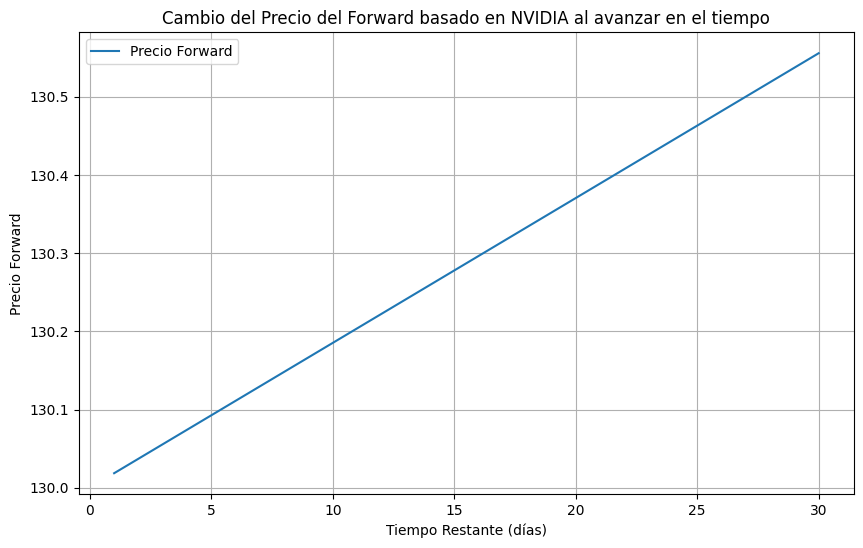

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Descargar datos de Yahoo Finance
data = yf.download(tickers="NVDA", period="1d")
spot_price = data['Close'].iloc[-1]
print(f"Precio spot actual de NVIDIA: {spot_price:.2f}")

# Parámetros
r = 0.052  # Tasa de interés libre de riesgo (anual)
T = 30  # Horizonte temporal inicial en días (30 días)
Qty = 1000  # Número de acciones en el contrato
New_Spot_Price = 130  # Supongamos que el precio spot sube a 130 después de 10 días

# Crear lista para almacenar los parámetros y el valor del contrato forward
data_list = []

# Calcular el precio forward para diferentes tiempos
for t in range(1, T + 1):
    T_years = T / 365  # Convertir tiempo inicial a años
    t_years = t / 365  # Convertir tiempo restante a años
    forward_price = spot_price * (1 + r * T_years)
    new_forward_price = New_Spot_Price * (1 + r * t_years)
    data_list.append({
        'spot_price': spot_price,
        'r': r,
        'T (días)': T,
        't (días)': t,
        'New_Spot_Price': New_Spot_Price,
        'forward_price': new_forward_price
    })

# Convertir la lista a DataFrame
df = pd.DataFrame(data_list)

print(df)

# Visualizar el cambio del precio del Forward en el tiempo
plt.figure(figsize=(10, 6))
plt.plot(df['t (días)'], df['forward_price'], label='Precio Forward')
plt.xlabel('Tiempo Restante (días)')
plt.ylabel('Precio Forward')
plt.title('Cambio del Precio del Forward basado en NVIDIA al avanzar en el tiempo')
plt.legend()
plt.grid(True)
plt.show()



# Redes Neuronales

In [ ]:
from tensorflow import keras
import tensorflow as tf

model = keras.Sequential(
    [
        keras.layers.Dense(64, activation="relu", input_shape=(5,)),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ]
)
model.summary()

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(0.01), loss="mse",
)

history = model.fit(
    "train_features",
    "train_targets",
    batch_size=20, # Cantidad de datos que optimizan pesos por cada pasada, "batch size"
    epochs=30, # Cantidad de pasadas que dan todos los datos, para entrenamiento
    verbose=2,
)

¿Podríamos hacer una red que haga predicciones recibiendo solo el tiempo como parámetro?